#VANILLA NETWORK


*   Will keep the parameters count less than 15k as it is a constraint for the assignment.
*   Will keep the same batch size - 32.
*   Will keep the Learning Rate as default one.
*   Will keep the optimizer same as 'adam'.
*   Will run for more epochs (say 50) to see the capacity of the network.

# **Import Libraries and modules**

In [1]:
# https://keras.io/
# Installing Keras which is open-source neural-network library written in Python.
!pip install -q keras

# Importing the keras library.
import keras

Using TensorFlow backend.


In [0]:
# Importing NumPy (Numerical Python) which is a library consisting of multidimensional array objects and a collection of routines for processing those arrays. It also gives an alias to the library.
import numpy as np

# There are two main types of models available in Keras: the Sequential model and the Model class used with the functional API.
# Sequential model is a linear stack of layers. Importing Sequential model from Keras.
from keras.models import Sequential

# Importing different layers from Keras.
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D, BatchNormalization

# Importing the utils library of Keras.
from keras.utils import np_utils

# Importing the callbacks of Keras.
from keras.callbacks import ModelCheckpoint

# MNIST is a database of handwritten digits. It is a dataset of 60,000 28x28 grayscale images of the 10 digits, along with a test set of 10,000 images. Importing MNIST dataset from Keras.
from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [3]:
# Loading the MNIST 60000 Training and 10000 Test data into respective numpy arrays
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


(60000, 28, 28)


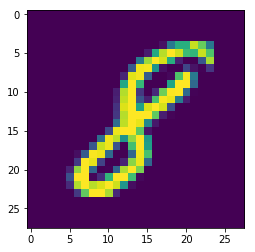

In [4]:
# Printing the shape of the Training data
print (X_train.shape)

# Matplotlib is a plotting library for Python. Pyplot is a collection of command style functions that make matplotlib work like MATLAB. Each pyplot function makes some change to a figure: e.g., creates a figure, creates a plotting area in a figure, plots some lines in a plotting area, decorates the plot with labels, etc.
from matplotlib import pyplot as plt

# Sets the backend of matplotlib to 'inline' backend. With this backend, the output of plotting commands is displayed inline within frontends like the Jupyter notebook, directly below the code cell that produced it.
%matplotlib inline

# Renders the image.
plt.imshow(X_train[7777])

In [0]:
# Reshaping the Training and Test data to add the channel parameter as the input to Conv2D layer is expected to be of shape (img_rows, img_cols, num_channels) if data_format="channels_last" which is default.
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
# Normalizing the Training and Test values
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [7]:
# Printing the first 10 labelled Training data
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
# np.utils.to_categorical is used to convert array of labelled data (from 0 to nb_classes-1) to one-hot vector.
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [9]:
# Printing the first 10 labelled Training data after converting to one-hot vector.
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [10]:
from keras.layers import Activation

model = Sequential()

model.add(Convolution2D(8, 3, input_shape=(28,28,1), use_bias=False)) # RF - 3X3, O/P - 26x26
model.add(Activation('relu'))

model.add(Convolution2D(14, 3, use_bias=False)) # RF - 5X5, O/P - 24x24
model.add(Activation('relu'))

model.add(Convolution2D(16, 3, use_bias=False)) # RF - 7X7, O/P - 22x22
model.add(Activation('relu'))

model.add(Convolution2D(8, 1, use_bias=False))
model.add(MaxPooling2D(pool_size = (2, 2), strides=None, padding='valid', data_format=None)) # RF - 14X14, O/P - 11x11

model.add(Convolution2D(8, 3, use_bias=False)) # RF - 16X16, O/P - 9X9
model.add(Activation('relu'))

model.add(Convolution2D(14, 3, use_bias=False)) # RF - 16X16, O/P - 7X7
model.add(Activation('relu'))

model.add(Convolution2D(16, 3, use_bias=False)) # RF - 18X18, O/P - 5X5
model.add(Activation('relu'))

model.add(Convolution2D(10, 1, use_bias=False))
model.add(Activation('relu'))

model.add(Convolution2D(10, 5, use_bias=False)) # RF - 20X20, O/P - 5X5

model.add(Flatten())
model.add(Activation('softmax'))

Instructions for updating:
Colocations handled automatically by placer.


In [11]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 8)         72        
_________________________________________________________________
activation_1 (Activation)    (None, 26, 26, 8)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 14)        1008      
_________________________________________________________________
activation_2 (Activation)    (None, 24, 24, 14)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 22, 22, 16)        2016      
_________________________________________________________________
activation_3 (Activation)    (None, 22, 22, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 22, 22, 8)         128       
__________

In [0]:
# Compiling the model
# Loss function is one of the arguments required for compiling a model. categorical_crossentropy loss function is used if the targets are one-hot encoded.
# Optimizer is one of the arguments required for compiling a model. Adam is an optimization algorithm that can used instead of the classical stochastic gradient descent procedure to update network weights iterative based in training data.
# A metric is a function that is used to judge the performance of your model.
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [13]:
# Training the model for 50 epochs using batch_size of 32.
model.fit(X_train, Y_train, batch_size=32, nb_epoch=50, verbose=1,validation_data=(X_test, Y_test))

Instructions for updating:
Use tf.cast instead.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 14s 238us/step - loss: 0.2388 - acc: 0.9243 - val_loss: 0.0757 - val_acc: 0.9764
Epoch 2/50
60000/60000 [==============================] - 9s 157us/step - loss: 0.0869 - acc: 0.9741 - val_loss: 0.0577 - val_acc: 0.9803
Epoch 3/50
60000/60000 [==============================] - 9s 156us/step - loss: 0.0669 - acc: 0.9794 - val_loss: 0.0495 - val_acc: 0.9847
Epoch 4/50
60000/60000 [==============================] - 9s 154us/step - loss: 0.0562 - acc: 0.9829 - val_loss: 0.0596 - val_acc: 0.9815
Epoch 5/50
60000/60000 [==============================] - 9s 155us/step - loss: 0.0484 - acc: 0.9850 - val_loss: 0.0405 - val_acc: 0.9856
Epoch 6/50
60000/60000 [==============================] - 9s 156us/step - loss: 0.0424 - acc: 0.9868 - val_loss: 0.0340 - val_acc: 0.9886
Epoch 7/50
60000/60000 [==============================] - 10s 168us/step - loss: 0.0383 - acc: 0.9882 - val_loss: 0.0386 

# Best Validation Accuracy
Best validation accuracy is at **epoch 23** - **val_acc: 0.9916**

In [0]:
# Evaluating the model on the Test data using the weights of last epoch. Returns the loss value & metrics values for the model in test mode.
score = model.evaluate(X_test, Y_test, verbose=0)

In [15]:
# Printing the evaluation result
print(score);

[0.062234554029460425, 0.9882]


In [0]:
# Generates output predictions for the input samples.
y_pred = model.predict(X_test)

In [17]:
# Printing the outputs. y_pred results do not look correct.
print(y_pred[:9])
print(y_test[:9])

[[4.65895374e-24 1.78195487e-19 1.11880360e-13 2.95407275e-12
  5.66156359e-22 6.45947731e-20 0.00000000e+00 1.00000000e+00
  4.37219429e-16 2.00083645e-15]
 [7.21730305e-17 6.31491062e-13 1.00000000e+00 8.41569316e-19
  2.02793223e-21 8.35338358e-20 1.08539861e-15 4.81838361e-20
  2.00482404e-12 1.44996961e-25]
 [1.93030245e-11 9.99999881e-01 1.65916170e-09 1.66336146e-11
  8.13772782e-09 1.12904949e-07 6.58331289e-12 1.02050111e-08
  6.94706470e-09 1.25984531e-12]
 [1.00000000e+00 2.53710832e-18 9.68629482e-11 4.03132284e-11
  4.81969140e-19 1.05306305e-10 4.32666774e-08 4.96653879e-13
  9.98983001e-14 1.33855644e-11]
 [1.09769957e-21 1.30612457e-20 2.76111730e-17 2.76718370e-22
  1.00000000e+00 1.06401805e-25 6.47682355e-20 1.44701021e-22
  4.83118529e-16 3.37651542e-08]
 [1.20240120e-11 1.00000000e+00 4.80380846e-10 5.24084031e-13
  8.07443090e-09 5.57122681e-11 7.17235397e-15 3.30143948e-08
  7.75756459e-10 4.21618645e-14]
 [8.09275988e-36 1.85191175e-15 1.30062163e-26 3.03264055e

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

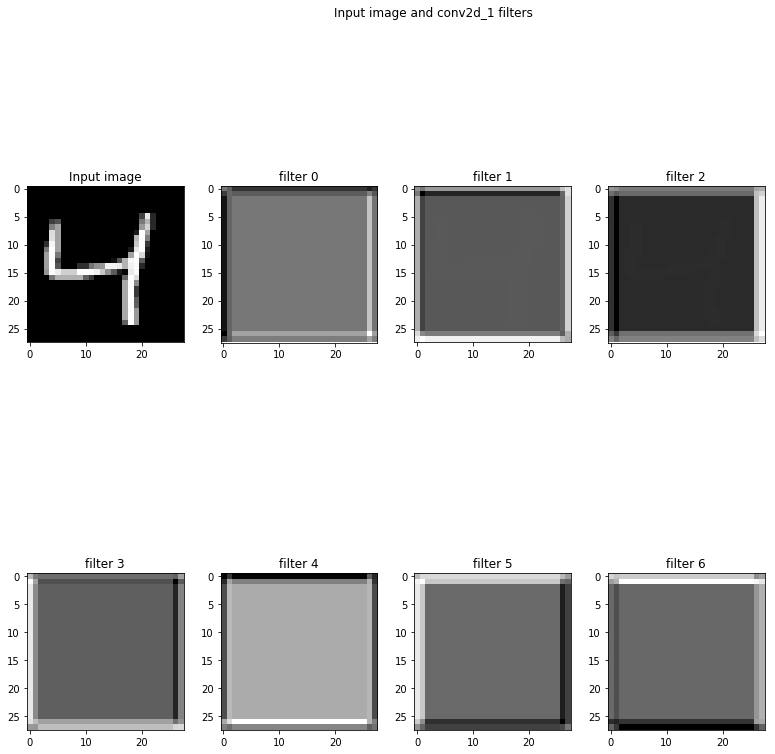

In [19]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_1'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 2, 4
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()